# Imorting the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import dill
plt.style.use("Solarize_Light2")
sns.set_theme(style="whitegrid")

# Exploratory Data Analysis (EDA)

# 1. Load & Inspect Data

In [2]:
df = pd.read_csv("P600_pronostico_dataset.csv",sep=';', engine='python')

In [3]:
df.drop(columns=["ID"], inplace = True,axis = 1)

In [4]:
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [5]:
df.tail()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy
5999,62.506825,96.900784,86.878033,108.625436,no_retinopathy


In [6]:
df.shape

(6000, 5)

In [7]:
df.columns

Index(['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6000 non-null   float64
 1   systolic_bp   6000 non-null   float64
 2   diastolic_bp  6000 non-null   float64
 3   cholesterol   6000 non-null   float64
 4   prognosis     6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 234.5+ KB


In [9]:
df.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

In [10]:
df["prognosis"] = df.prognosis.astype("category")

In [11]:
df.dtypes

age              float64
systolic_bp      float64
diastolic_bp     float64
cholesterol      float64
prognosis       category
dtype: object

In [12]:
df["prognosis"].nunique()

2

In [13]:
df["prognosis"].value_counts()

prognosis
retinopathy       3087
no_retinopathy    2913
Name: count, dtype: int64

In [14]:
df.describe()

,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255
std,8.564392,10.669267,9.648200,10.433915
min,35.164761,69.675429,62.807105,69.967453
25%,54.371941,93.267420,83.641788,93.202373
50%,59.831159,100.119926,89.912429,100.060637
75%,65.809652,107.439501,96.682405,107.250829
max,103.279497,151.699660,133.456382,148.233544


In [15]:
df[df["prognosis"] == "no_retinopathy"]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
12,66.890987,93.205124,85.270310,106.465128,no_retinopathy
15,62.929328,101.524942,95.684936,102.916473,no_retinopathy
16,74.275743,91.245927,78.204968,99.417104,no_retinopathy
17,58.267020,101.259314,86.790774,102.242965,no_retinopathy
18,62.744349,89.883434,80.923457,102.083878,no_retinopathy
...,...,...,...,...,...
5989,66.273056,95.931085,97.187327,112.075571,no_retinopathy
5993,53.279942,88.726857,78.845703,86.271988,no_retinopathy
5994,56.603050,105.062208,91.448914,111.989797,no_retinopathy
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy


# Insights from initial exploration of dataset :

### This is a binary classification problem aimed at detecting whether a patient shows signs of retinopathy (retinal damage) or has a normal, healthy retina (no retinopathy).

## Input variables : `['age', 'systolic_bp', 'diastolic_bp', 'cholesterol',]`
> * **age** : Age of the person
> * **systolic_bp** : Systolic blood pressure (The top number in a blood pressure reading — measures pressure when the heart beats)
> * **diastolic_bp** : Diastolic blood pressure (The bottom number — measures pressure when the heart rests between beats)
> * **cholesterol** : Cholesterol level (The amount of cholesterol in the blood (higher → more risk))
## Target variable : `prognosis` -> ['retinopathy', 'no_retinopathy']
> * **prognosis** : Health condition or prediction (The doctor’s or model’s prediction — shows whether the person is healthy or at risk)


# 2. Check Missing Values 

In [16]:
df.isnull().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

# 3. Check Duplicates

In [17]:
df.duplicated().sum()

0

# 4. Univariate Analysis (Single variable at a time)

## 4.1. Univariate analysis for Numerical data: -> `['age', 'systolic_bp', 'diastolic_bp', 'cholesterol',]`

In [18]:
class UnivariateAnalysis:
    def __init__(self,data,col_name):
        self.df = data
        self.col_name = col_name


    def univariate_distribution_plots(self): 
        plt.figure(figsize=(15, 12))
        
        # histplot for distribution check 
        plt.subplot(2,2,1)
        sns.histplot(x=self.df[self.col_name] , alpha = 0.7, kde = True)
        plt.title(f"Histplot of {self.col_name}")
    
        plt.subplot(2,2,2)
        sns.kdeplot(x=self.df[self.col_name]  )
        plt.title(f"Kdeplot of {self.col_name}")
    
        # Plot boxplot for outlier detection
        plt.subplot(2,2,3)
        sns.boxplot(x=self.df[self.col_name], color="skyblue", orient="Vertical")
        plt.title(f"Boxplot of {self.col_name}")
    
        # QQ-plot for Normality Check
        plt.subplot(2,2,4)
        stats.probplot(self.df[self.col_name], dist="norm", plot=plt)
        plt.title(f"QQ-Plot of {self.col_name}")
    
        plt.show()


    def skewness_check(self):
        # Drop NaN values for safety
        skewness = self.df[self.col_name].dropna().skew()
        
        # Interpret skewness
        if abs(skewness) < 0.5:
            interpretation = "Approximately symmetric"
        elif skewness < -0.5:
            interpretation = "Left skewed"
        else:
            interpretation = "Right skewed"
        
        # Print & Return
        print(f"Skewness of {self.col_name}: {skewness:.3f} → {interpretation} ")
        return f"{interpretation} -> {skewness:.3f}" 

Univariate analysis on feature : age feature


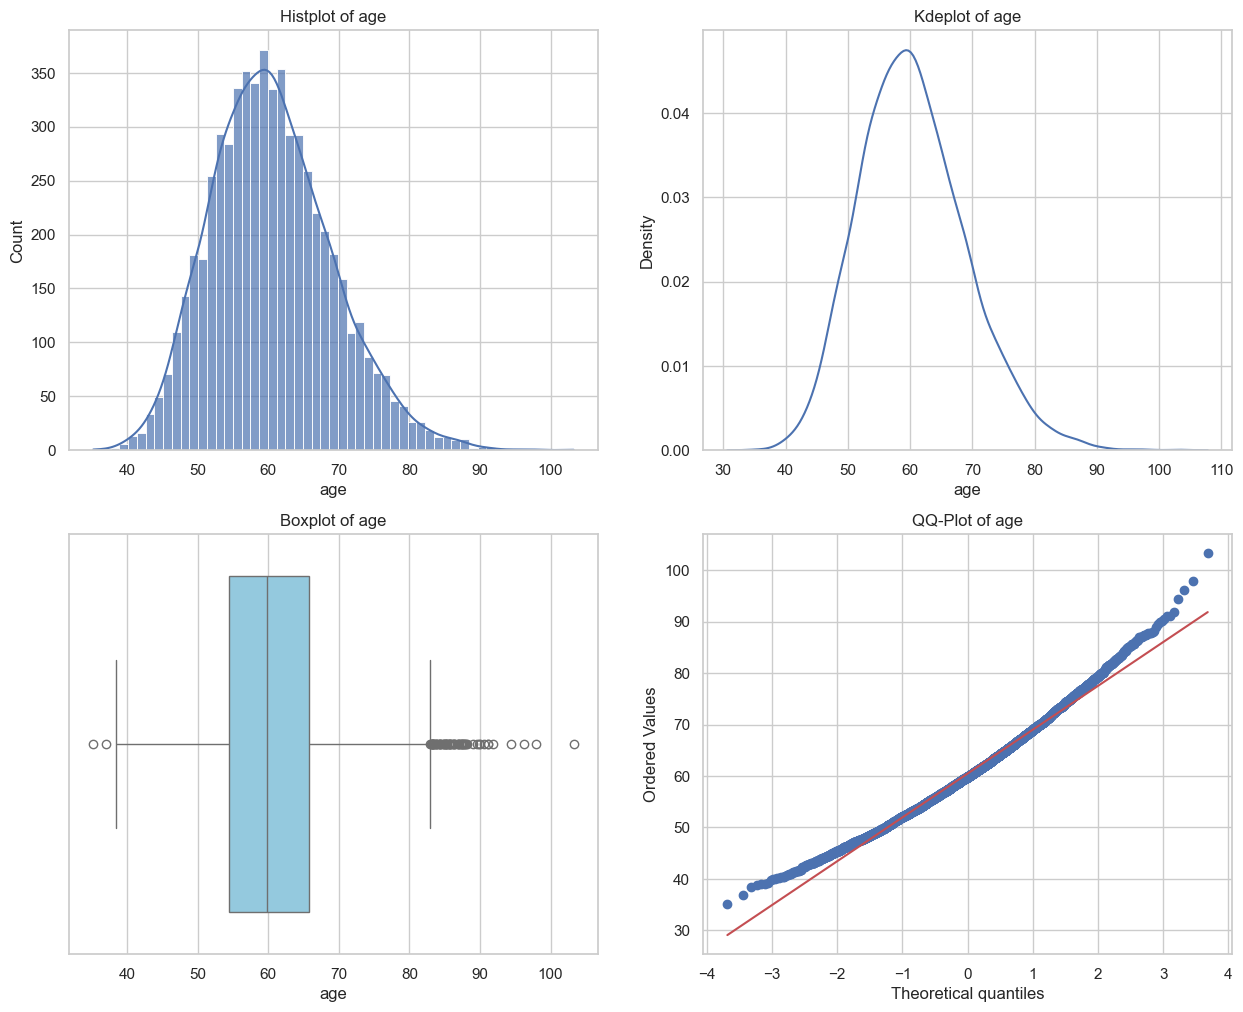

Skewness of age: 0.441 → Approximately symmetric 


Univariate analysis on feature : systolic_bp feature


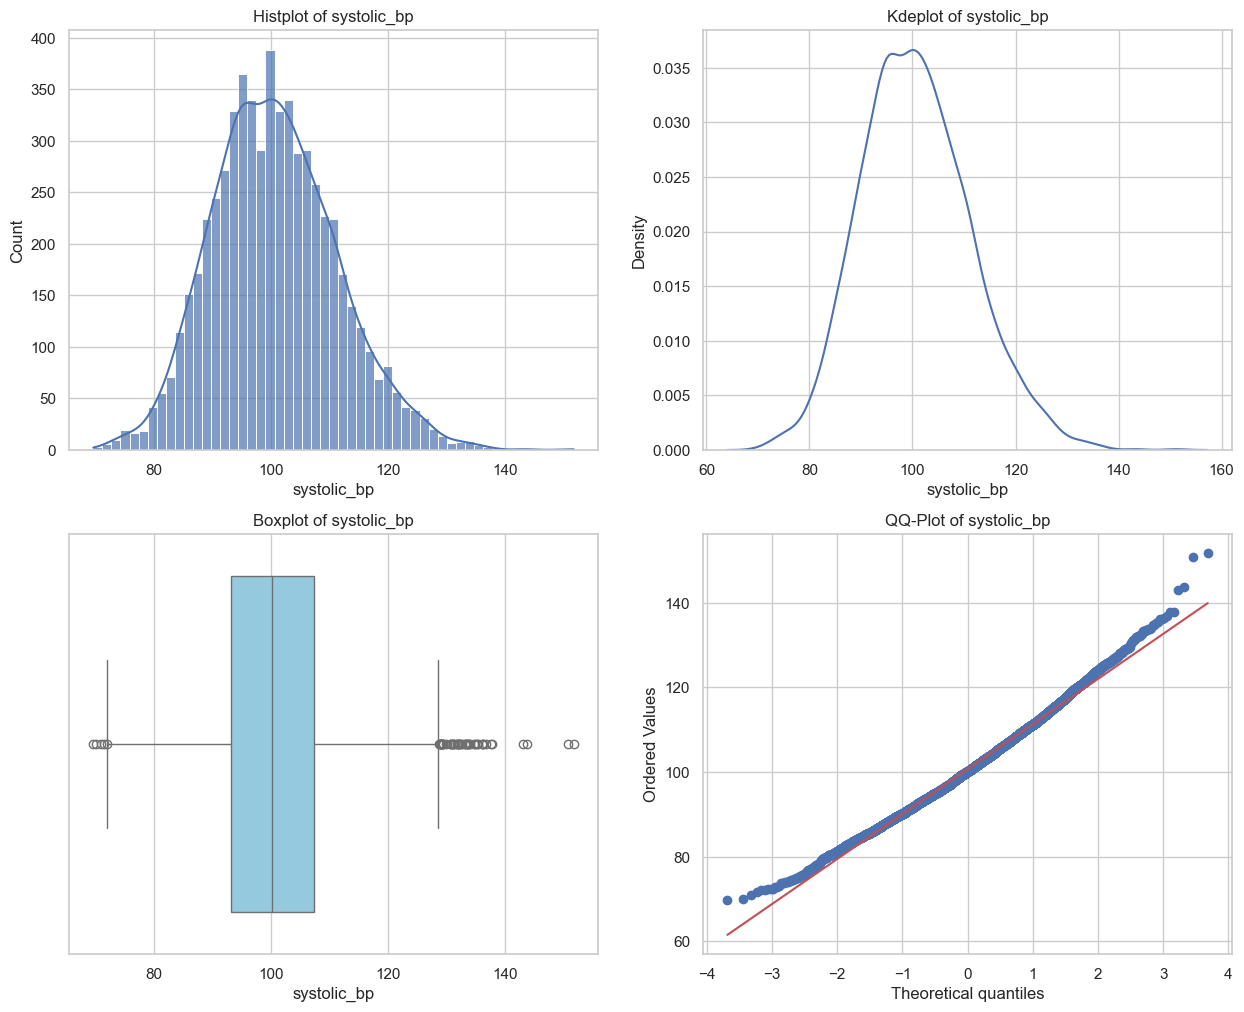

Skewness of systolic_bp: 0.335 → Approximately symmetric 


Univariate analysis on feature : diastolic_bp feature


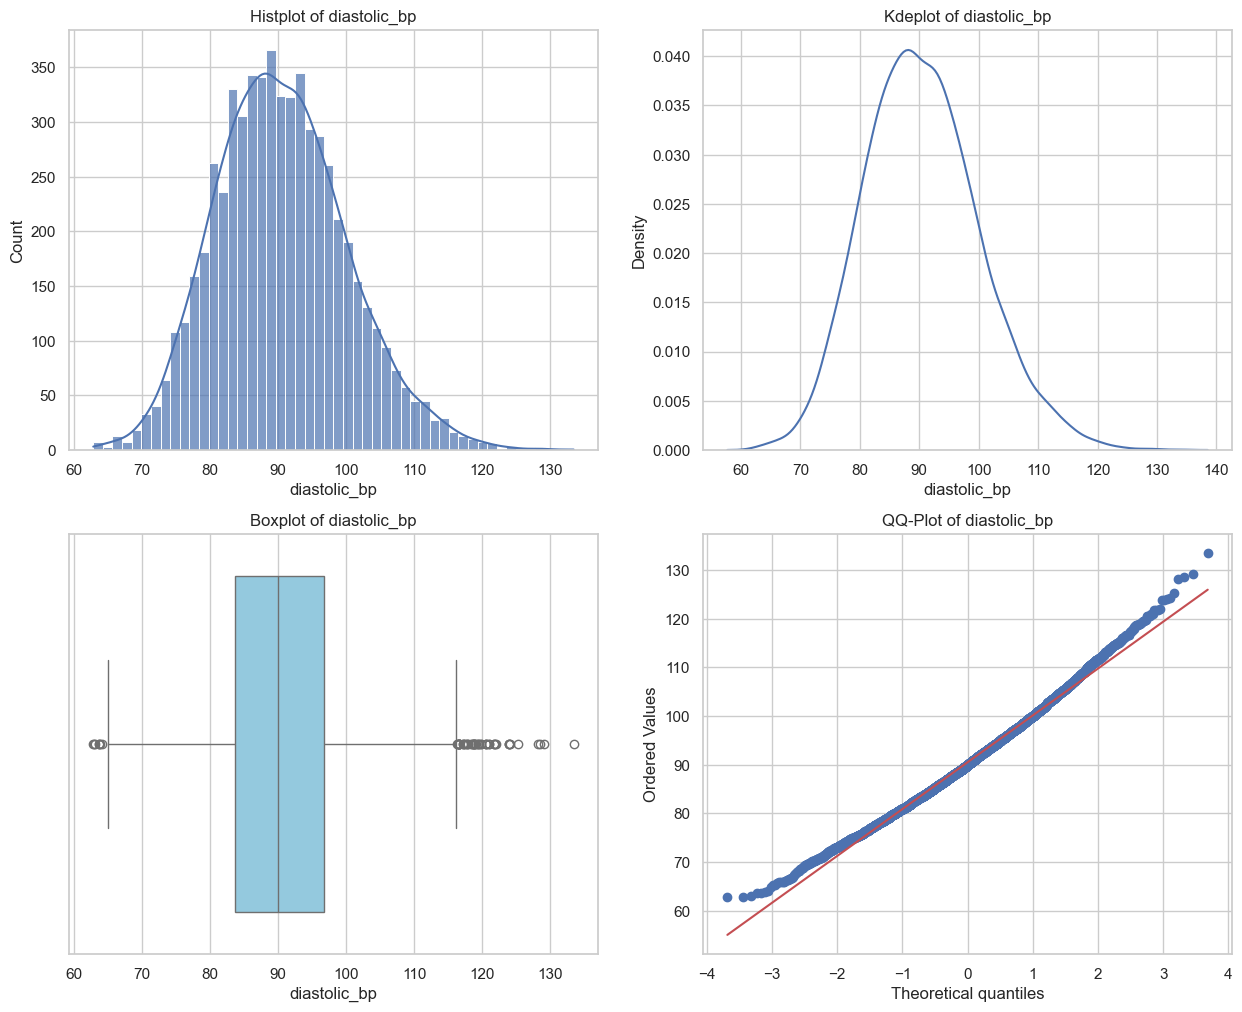

Skewness of diastolic_bp: 0.337 → Approximately symmetric 


Univariate analysis on feature : cholesterol feature


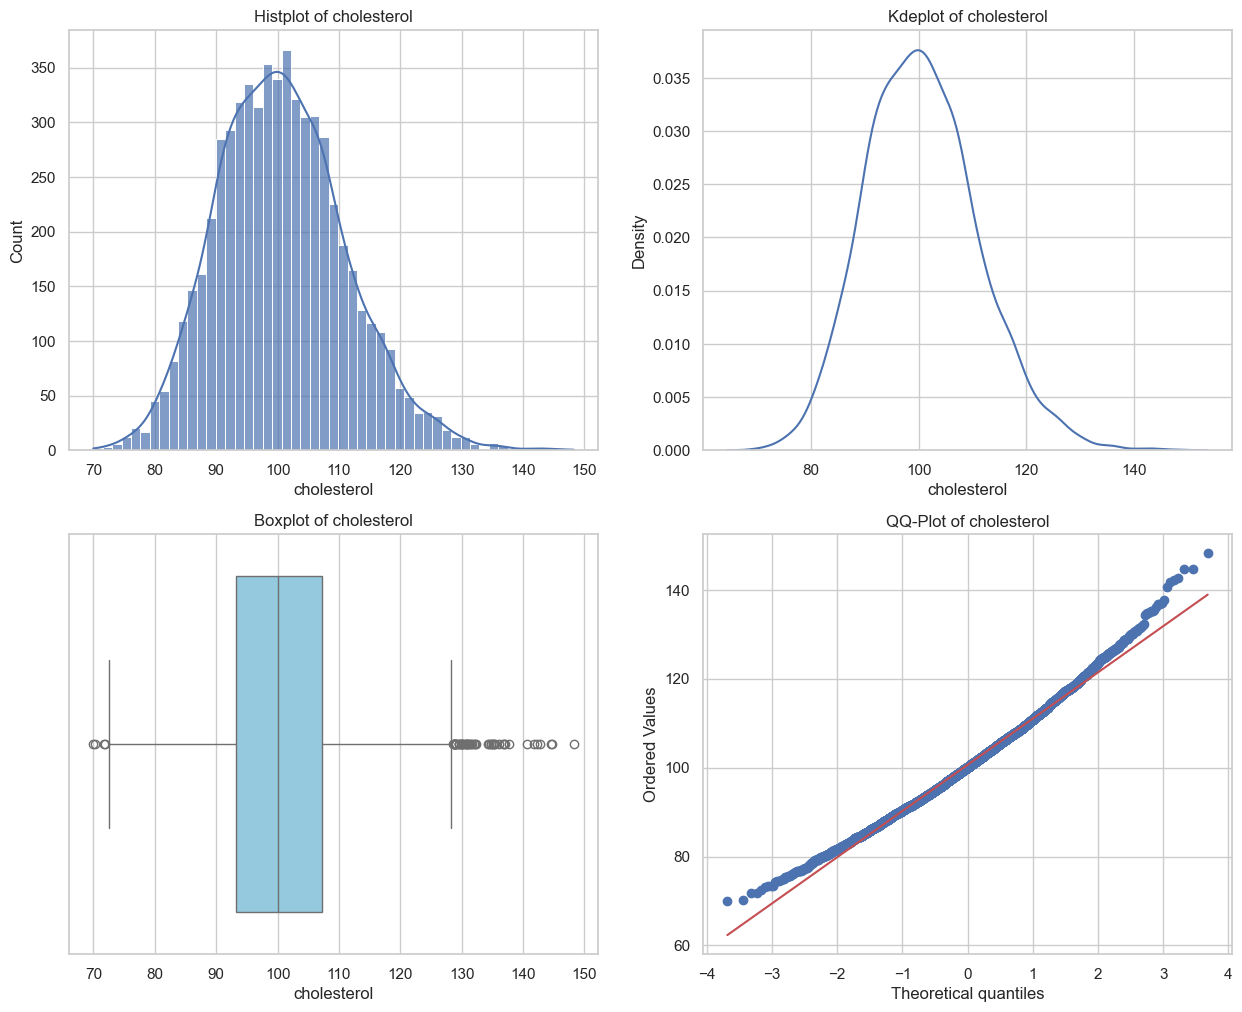

Skewness of cholesterol: 0.362 → Approximately symmetric 




In [19]:
num_col = df.select_dtypes(include = ["float"]).columns.to_list()
num_col

univariate = UnivariateAnalysis(df,"age")

for col in num_col:
    print(f"Univariate analysis on feature : {col} feature")
    univariate = UnivariateAnalysis(df,col)
    univariate.univariate_distribution_plots()
    univariate.skewness_check()
    print()
    print()

## 4.2. Univariate analysis for Categorical columns : -> `Prognosis`

Categorical feature frequency analysis for [prognosis] feature:


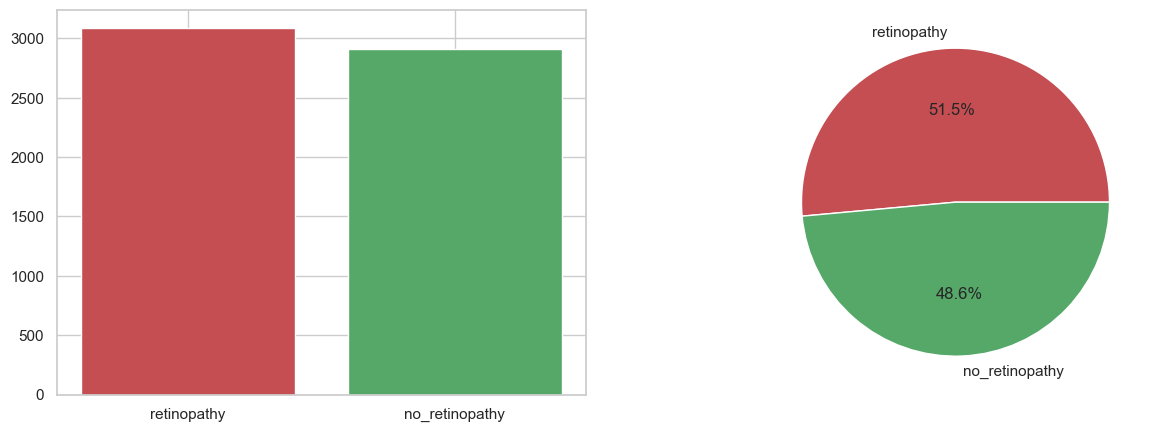

In [20]:
count = df["prognosis"].value_counts()


print(f"Categorical feature frequency analysis for [prognosis] feature:")
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.bar(x=count.index, height=count.values ,color = ["r","g"])

plt.subplot(1,2,2)
plt.pie(x= count, labels=count.index, autopct = "%1.1f%%",colors=["r","g"] )
plt.show()

# 5. Bivariate Analysis (Feature vs Target)

* Numerical vs Categorical Relationship
* When one variable is numerical and the other is categorical, we analyze how the numerical variable differs across categories.
* t-Test -> to check if mean differences are statistically significant

In [21]:
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm

In [1]:
from scipy.stats import ttest_ind, f_oneway
def bivariate_analysis_num_vs_cat(df,feature,target):

    # ---------------- Numerical vs Categorical ----------------
    groups = [df[df[target] == val][feature].dropna() for val in df[target].unique()]

        
    # t-test for binary target
    if len(groups) == 2:
        stat, p = ttest_ind(groups[0], groups[1])
        print(f"T-test: p-value={p:.5f}")


    # Visualization
    plt.style.use("Solarize_Light2")
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.boxplot(x=target, y=feature, hue = target, data=df ,palette="Set2")
    plt.title(f"{feature} vs {target}")

    plt.subplot(1,2,2)
    sns.violinplot(x=target, y=feature, data=df,hue = target , palette="Set2")
    plt.title(f"{feature} vs {target} (Distribution)")
    plt.show()
        

Type: Numerical vs Categorical

significant diffenrent analysis test between [age] vs [prognosis] features
T-test: p-value=0.00000


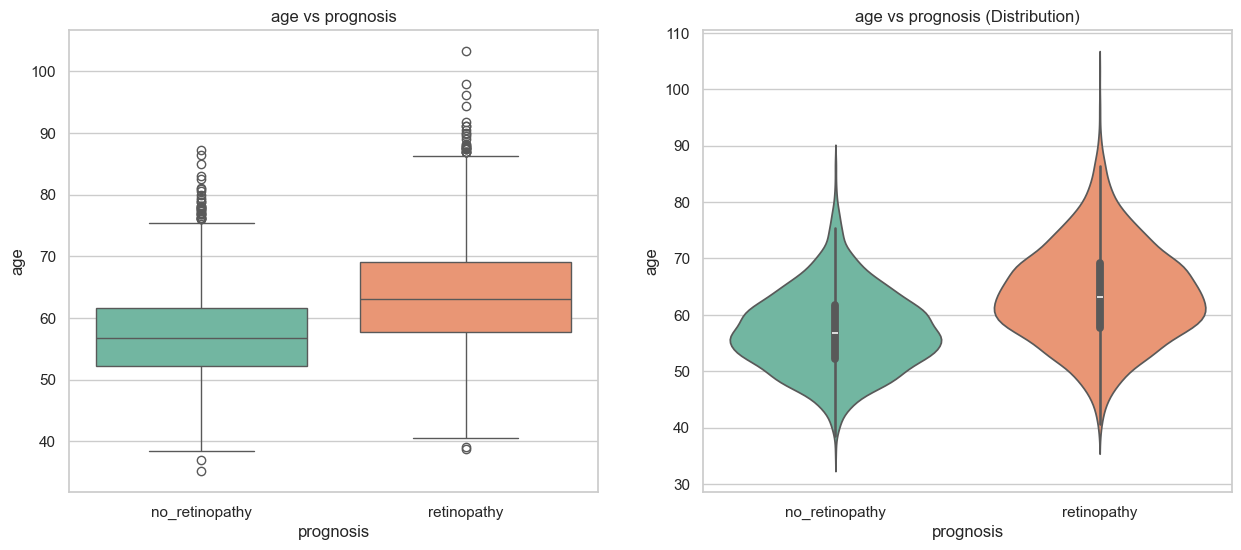

------------------------------------------------------------------------------------------------------------------------------------------------------


significant diffenrent analysis test between [systolic_bp] vs [prognosis] features
T-test: p-value=0.00000


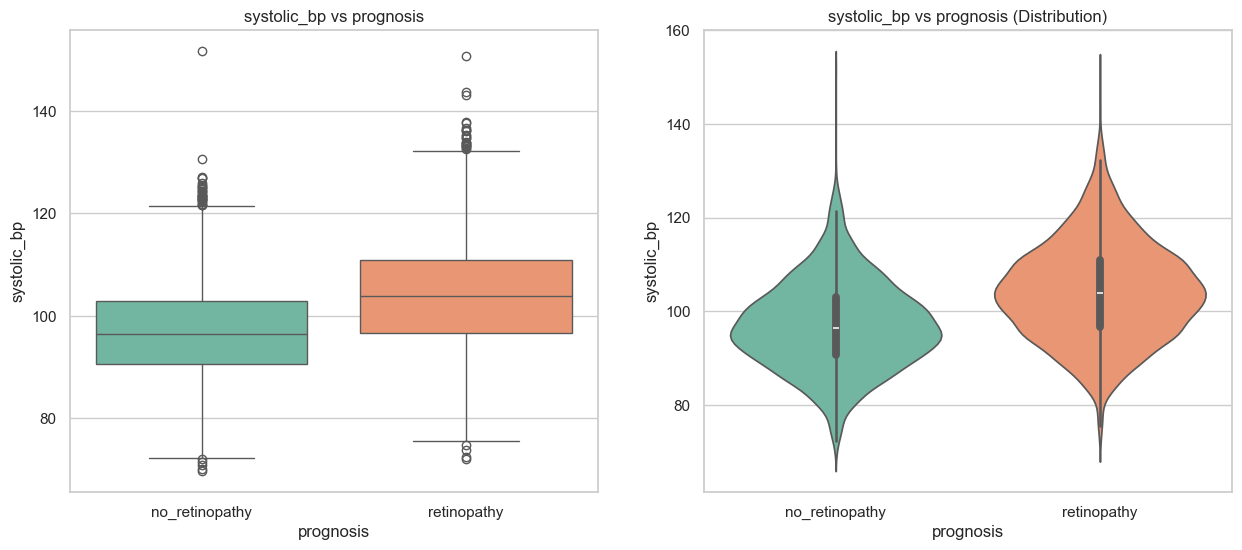

------------------------------------------------------------------------------------------------------------------------------------------------------


significant diffenrent analysis test between [diastolic_bp] vs [prognosis] features
T-test: p-value=0.00000


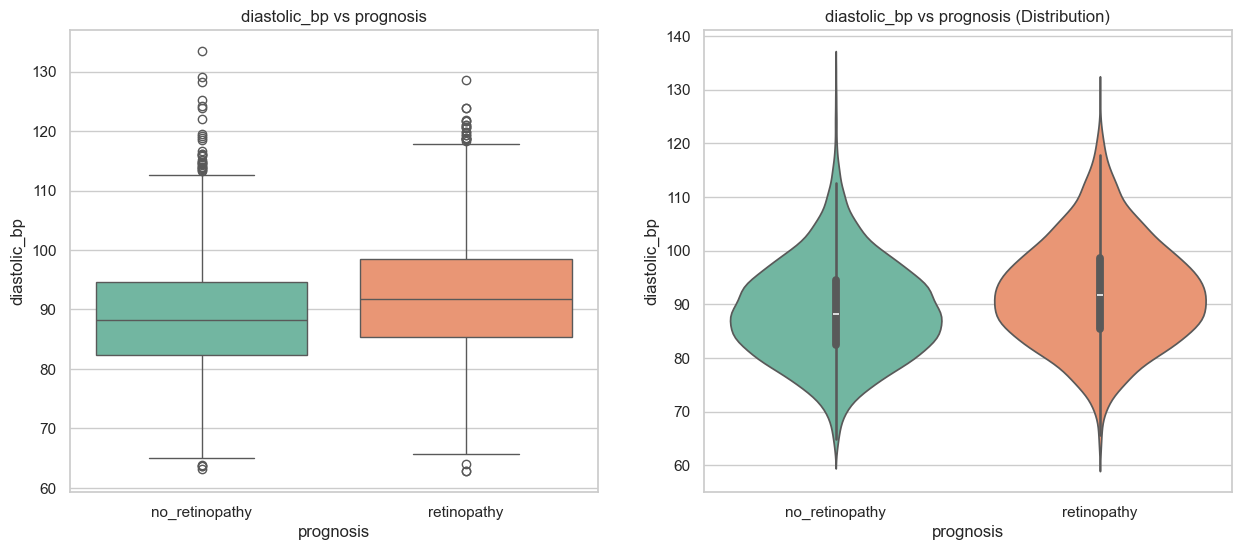

------------------------------------------------------------------------------------------------------------------------------------------------------


significant diffenrent analysis test between [cholesterol] vs [prognosis] features
T-test: p-value=0.00000


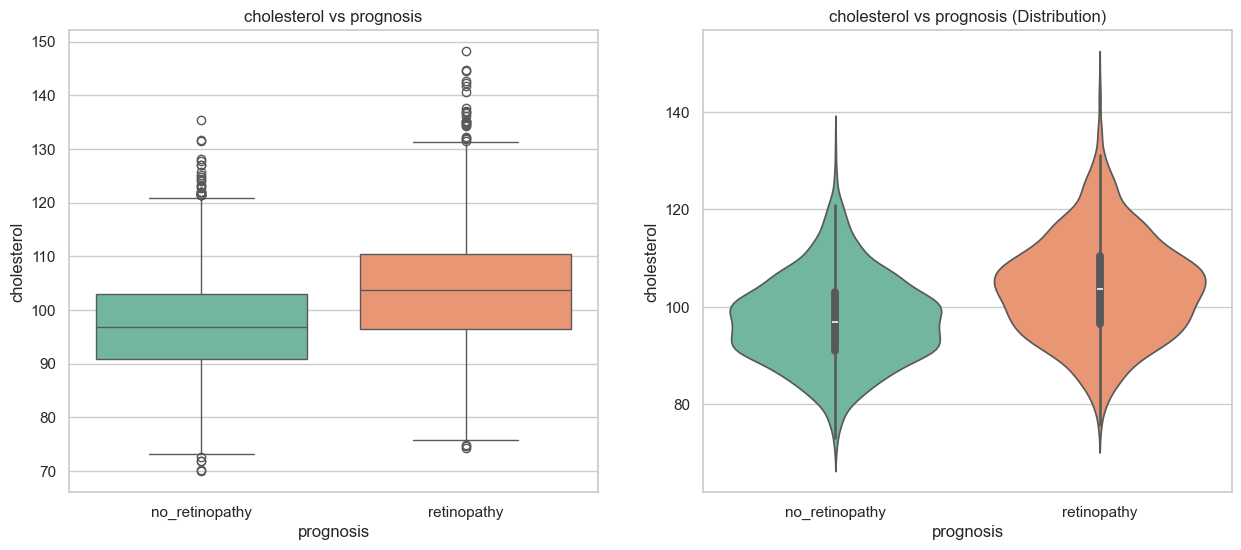

------------------------------------------------------------------------------------------------------------------------------------------------------




In [23]:
num_col = df.select_dtypes(include = ["float"]).columns.to_list()
target = "prognosis"
print("Type: Numerical vs Categorical",end="\n\n")
for col in num_col:
    print(f"significant diffenrent analysis test between [{col}] vs [{target}] features")
    bivariate_analysis_num_vs_cat(df,col,target)
    print("-"*150)
    print()
    print()

# 6. Multivariate Analysis (Feature vs Feature)

In [24]:
df.corr(numeric_only=True)

,age,systolic_bp,diastolic_bp,cholesterol
age,1.000000,0.010361,-0.005410,-0.006972
systolic_bp,0.010361,1.000000,0.405406,0.406029
diastolic_bp,-0.005410,0.405406,1.000000,0.398345
cholesterol,-0.006972,0.406029,0.398345,1.000000


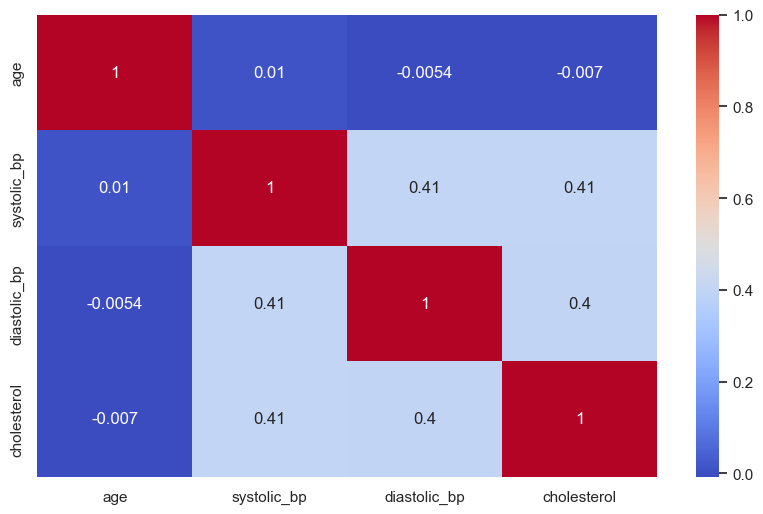

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap = "coolwarm", annot = True)
plt.show()

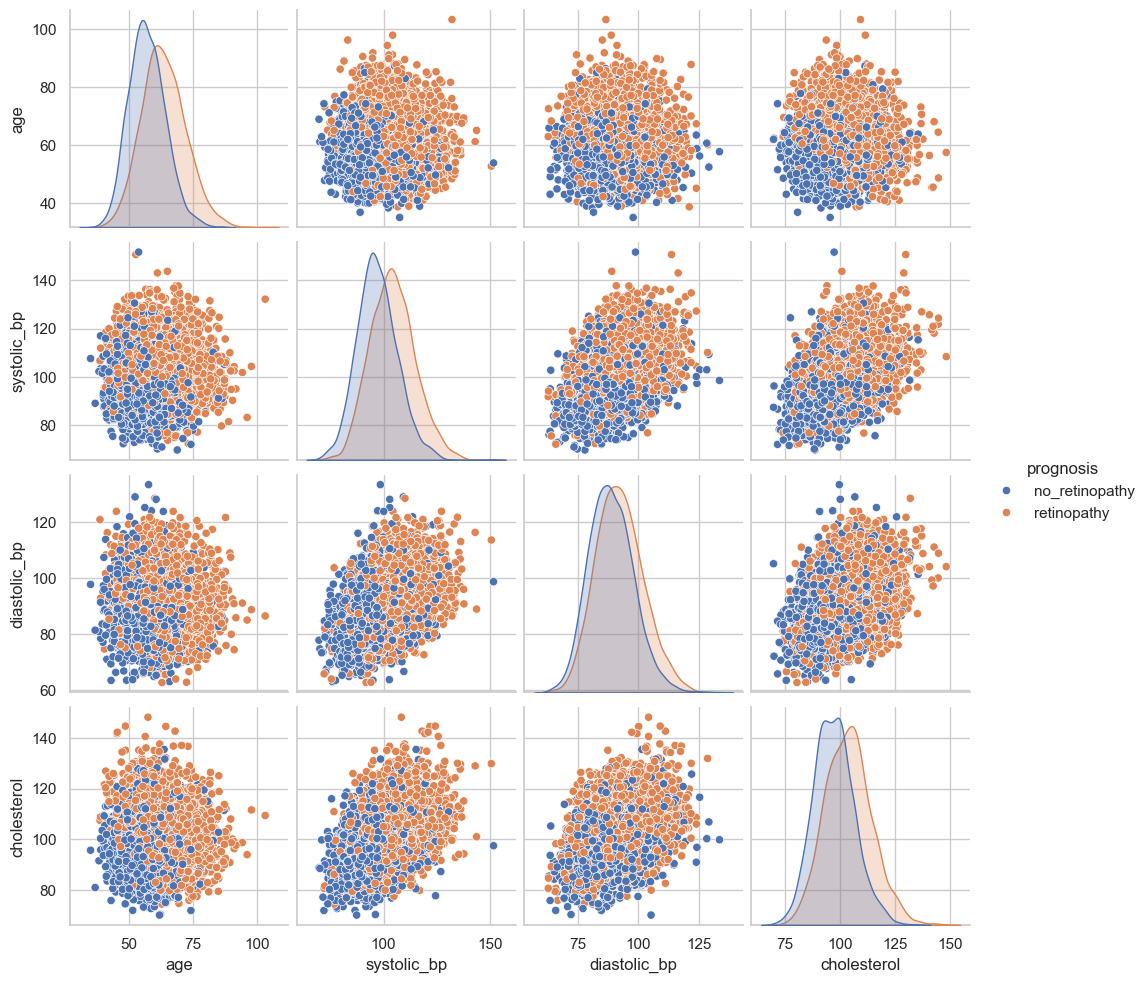

In [26]:
sns.pairplot(df, vars=num_col, hue='prognosis')
plt.show()

# 7. Outlier Detection

### Z-Score formula = $$ Z = \frac{X - \mu}{\sigma} $$

* Z → Z-score (standardized value)
* X → Actual data point
* μ → Mean of the data
* σ → Standard deviation of the data
* If ∣Z∣>3, the data point is typically considered an outlier.

In [27]:
from scipy.stats import zscore
def outlier_detection(df,col):
    z_scores = zscore(df[col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df.iloc[outliers_index]
    return outliers

In [28]:
for col in num_col:
    outliers = outlier_detection(df,col)
    print(f"Total outliers in [{col}] feature [{len(outliers)}]")
    display(outliers)
    print("-"*150)
    print()
    print()

Total outliers in [age] feature [30]


,age,systolic_bp,diastolic_bp,cholesterol,prognosis
494,88.192280,105.019242,96.770507,102.213642,retinopathy
898,86.919000,98.832910,91.423936,111.608300,retinopathy
943,88.991259,81.420801,95.767988,104.277551,retinopathy
1054,94.381111,101.794209,91.183143,98.603710,retinopathy
1351,87.523454,91.807235,84.977094,98.335758,retinopathy
1488,87.995287,106.801490,76.017583,112.057964,retinopathy
1587,86.248684,107.006486,86.914212,95.684916,retinopathy
1816,87.244302,105.206286,102.553901,111.384933,no_retinopathy
2060,91.175560,104.196667,74.504280,96.243320,retinopathy
3082,96.227225,83.193913,85.116888,93.851045,retinopathy


------------------------------------------------------------------------------------------------------------------------------------------------------


Total outliers in [systolic_bp] feature [22]


,age,systolic_bp,diastolic_bp,cholesterol,prognosis
367,56.709259,136.298251,113.124571,111.942364,retinopathy
389,61.424309,133.231311,105.036232,105.950199,retinopathy
504,57.094555,133.972478,91.472213,109.131733,retinopathy
534,49.975447,133.442836,89.371453,117.593901,retinopathy
1032,58.252152,136.205482,97.084642,129.562672,retinopathy
1413,54.124284,133.747265,91.145666,92.757082,retinopathy
1442,68.031559,135.140513,101.859688,113.009675,retinopathy
1588,68.491526,137.785774,90.876388,94.170196,retinopathy
2605,52.830968,150.670082,113.691693,129.862805,retinopathy
2690,58.446822,135.409354,109.254995,93.978299,retinopathy


------------------------------------------------------------------------------------------------------------------------------------------------------


Total outliers in [diastolic_bp] feature [21]


,age,systolic_bp,diastolic_bp,cholesterol,prognosis
242,58.871766,97.247527,124.143136,96.775539,no_retinopathy
406,67.404012,104.409097,123.913707,108.544215,retinopathy
430,56.128985,118.542803,121.031955,119.820215,retinopathy
545,56.313788,102.927237,125.289993,116.587377,no_retinopathy
589,38.829539,106.671573,120.972543,107.418557,retinopathy
660,52.514843,109.308127,129.086305,106.808021,no_retinopathy
819,60.197121,110.094324,128.568519,131.925347,retinopathy
1397,45.213993,127.260297,123.928961,105.960085,retinopathy
1760,63.536462,100.112540,123.903938,90.876591,no_retinopathy
2110,76.611699,125.990003,120.627887,104.320675,retinopathy


------------------------------------------------------------------------------------------------------------------------------------------------------


Total outliers in [cholesterol] feature [22]


,age,systolic_bp,diastolic_bp,cholesterol,prognosis
152,53.944245,117.305536,111.502024,135.194476,retinopathy
1002,56.487189,125.727737,104.201718,140.607313,retinopathy
1283,64.516802,121.796527,100.132197,144.583159,retinopathy
1300,48.799154,95.762998,87.382763,135.166016,retinopathy
1784,55.196670,108.463984,108.358809,132.106672,retinopathy
1873,47.456596,109.486845,111.672715,134.470779,retinopathy
1920,73.185131,102.856662,103.426931,136.735671,retinopathy
2100,59.996423,101.542319,103.528847,135.080991,retinopathy
2119,64.486833,110.761237,92.895260,132.260340,retinopathy
2320,62.081121,109.228592,113.280449,134.276119,retinopathy


------------------------------------------------------------------------------------------------------------------------------------------------------




In [29]:
# df[ ( df["age"] <= 20 ) | ( df["age"] >=110 )]
# df[ ( df["systolic_bp"] <= 70 ) | ( df["systolic_bp"] >=200 )]
# df[ ( df["diastolic_bp"] <= 60 ) | ( df["diastolic_bp"] >=130 )]
# df[ ( df["cholesterol"] <= 75 ) | ( df["cholesterol"] >=120 )]

# Data Preprocessing 

In [30]:
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


# 1. Feature Engineering (Add Medical Relationships)

### 1.1 Adding new feature : Pulse Pressure (PP): systolic - diastolic

In [31]:
df['pulse_pressure'] = df['systolic_bp'] - df['diastolic_bp']

In [32]:
df.head(5)

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,pulse_pressure
0,77.196340,85.288742,80.021878,79.957109,retinopathy,5.266865
1,63.529850,99.379736,84.852361,110.382411,retinopathy,14.527375
2,69.003986,111.349455,109.850616,100.828246,retinopathy,1.498839
3,82.638210,95.056128,79.666851,87.066303,retinopathy,15.389277
4,78.346286,109.154591,90.713220,92.511770,retinopathy,18.441371


### 1.2 Adding new feature : BP Ratio: systolic/diastolic proportion

In [33]:
df['bp_ratio'] = df['systolic_bp'] / df['diastolic_bp']

In [34]:
df.head(5)

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,pulse_pressure,bp_ratio
0,77.196340,85.288742,80.021878,79.957109,retinopathy,5.266865,1.065818
1,63.529850,99.379736,84.852361,110.382411,retinopathy,14.527375,1.171208
2,69.003986,111.349455,109.850616,100.828246,retinopathy,1.498839,1.013644
3,82.638210,95.056128,79.666851,87.066303,retinopathy,15.389277,1.193170
4,78.346286,109.154591,90.713220,92.511770,retinopathy,18.441371,1.203293


### 1.3 Adding new feature : Age Group Bins

In [35]:
# Age Group Bins
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 40, 60, 80, np.inf],
    labels=['young', 'middle_age', 'senior', 'elderly']
)

In [36]:
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,pulse_pressure,bp_ratio,age_group
0,77.196340,85.288742,80.021878,79.957109,retinopathy,5.266865,1.065818,senior
1,63.529850,99.379736,84.852361,110.382411,retinopathy,14.527375,1.171208,senior
2,69.003986,111.349455,109.850616,100.828246,retinopathy,1.498839,1.013644,senior
3,82.638210,95.056128,79.666851,87.066303,retinopathy,15.389277,1.193170,elderly
4,78.346286,109.154591,90.713220,92.511770,retinopathy,18.441371,1.203293,senior


# 2. Encoding categorical Features

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [38]:
df['prognosis']

0          retinopathy
1          retinopathy
2          retinopathy
3          retinopathy
4          retinopathy
             ...      
5995    no_retinopathy
5996       retinopathy
5997       retinopathy
5998       retinopathy
5999    no_retinopathy
Name: prognosis, Length: 6000, dtype: category
Categories (2, object): ['no_retinopathy', 'retinopathy']

### 2.1. Encoding prognosis Feature

In [39]:
le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

In [40]:
df['prognosis']

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int32

### 2.2. Encoding age_group Feature

In [41]:
df['age_group']

0           senior
1           senior
2           senior
3          elderly
4           senior
           ...    
5995    middle_age
5996        senior
5997    middle_age
5998        senior
5999        senior
Name: age_group, Length: 6000, dtype: category
Categories (4, object): ['young' < 'middle_age' < 'senior' < 'elderly']

In [42]:
encoder = OrdinalEncoder(categories=[['young', 'middle_age', 'senior', 'elderly']])
df['age_group_encoded'] = encoder.fit_transform(df[['age_group']])

In [43]:
df['age_group_encoded']

0       2.0
1       2.0
2       2.0
3       3.0
4       2.0
       ... 
5995    1.0
5996    2.0
5997    1.0
5998    2.0
5999    2.0
Name: age_group_encoded, Length: 6000, dtype: float64

# 3. Train-Test-Split

In [44]:
X = df.drop(columns = ["prognosis"])
y = df["prognosis"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)

In [46]:
X_train.head()

,age,systolic_bp,diastolic_bp,cholesterol,pulse_pressure,bp_ratio,age_group,age_group_encoded
3897,56.851900,99.291585,88.682176,93.932698,10.609409,1.119634,middle_age,1.0
5628,63.928962,112.824734,113.190524,114.357602,-0.365790,0.996768,senior,2.0
1756,57.141658,99.156079,94.635016,98.931487,4.521063,1.047774,middle_age,1.0
2346,68.877904,95.558713,81.038382,93.668821,14.520331,1.179178,senior,2.0
2996,52.704802,98.603165,77.811338,95.455414,20.791827,1.267208,middle_age,1.0


In [47]:
X_test.head()

,age,systolic_bp,diastolic_bp,cholesterol,pulse_pressure,bp_ratio,age_group,age_group_encoded
1782,47.560989,101.621771,86.386967,106.609386,15.234803,1.176355,middle_age,1.0
3917,56.660791,118.134570,112.216252,114.815664,5.918318,1.052740,middle_age,1.0
221,57.106537,102.763612,83.166657,86.887754,19.596956,1.235635,middle_age,1.0
2135,55.154948,110.019211,84.083581,95.115501,25.935630,1.308451,middle_age,1.0
5224,59.979271,104.991782,94.383732,109.430576,10.608051,1.112393,middle_age,1.0


In [48]:
len(X_test)

1200

# 2. Feature Scaling

In [49]:
from sklearn.preprocessing import RobustScaler

num_features = ['age', 'systolic_bp', 'diastolic_bp', 'cholesterol',
                'pulse_pressure', 'bp_ratio', 'age_group_encoded']

# Create and fit the scaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train[num_features])
X_test_scaled = robust_scaler.transform(X_test[num_features])

In [50]:
X_train_scaled

array([[-0.2530388 , -0.0548139 , -0.1044812 , ...,  0.0312665 ,
         0.04423844,  0.        ],
       [ 0.36627256,  0.89970848,  1.79083452, ..., -0.71898046,
        -0.67109078,  1.        ],
       [-0.2276822 , -0.06437144,  0.35587262, ..., -0.38492304,
        -0.37413571,  0.        ],
       ...,
       [ 0.82916324, -0.31826008,  0.17885925, ..., -0.47451715,
        -0.44987281,  1.        ],
       [ 0.20995532,  0.25739543, -0.85751304, ...,  0.99949087,
         1.17471762,  1.        ],
       [ 0.9636465 ,  0.4836835 ,  1.28952863, ..., -0.67905778,
        -0.64036936,  1.        ]])

In [51]:
X_train_scaled

array([[-0.2530388 , -0.0548139 , -0.1044812 , ...,  0.0312665 ,
         0.04423844,  0.        ],
       [ 0.36627256,  0.89970848,  1.79083452, ..., -0.71898046,
        -0.67109078,  1.        ],
       [-0.2276822 , -0.06437144,  0.35587262, ..., -0.38492304,
        -0.37413571,  0.        ],
       ...,
       [ 0.82916324, -0.31826008,  0.17885925, ..., -0.47451715,
        -0.44987281,  1.        ],
       [ 0.20995532,  0.25739543, -0.85751304, ...,  0.99949087,
         1.17471762,  1.        ],
       [ 0.9636465 ,  0.4836835 ,  1.28952863, ..., -0.67905778,
        -0.64036936,  1.        ]])

# Model Training 

# 1. Logistic regression Model

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

Accuracy  and classification report of LogisticRegression: 
Accuracy: 0.7475

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       575
           1       0.76      0.75      0.76       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



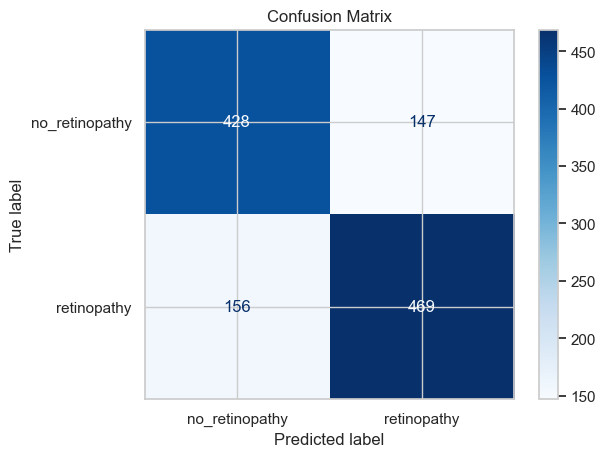

In [53]:
from sklearn.linear_model import LogisticRegression
# ===================== Logistic regression Model =====================
model_logistic = LogisticRegression(max_iter=1000, random_state=42)

# ===================== Train =====================
model_logistic.fit(X_train_scaled, y_train)

# ===================== Predict =====================
y_pred = model_logistic.predict(X_test_scaled)

# ===================== Evaluate =====================
print("Accuracy  and classification report of LogisticRegression: ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1) Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2) Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['no_retinopathy', 'retinopathy'])
disp.plot(cmap=plt.cm.Blues)  # You can change color
plt.title("Confusion Matrix")
plt.show()


# ===================== Create Pipeline for Deployment =====================
prediction_pipeline = Pipeline([
    ('scaler', robust_scaler),   # your fitted RobustScaler
    ('model', model_logistic)         # your trained LogisticRegression model
])


# ===================== Save the Combined Pipeline =====================
# with open("logistic_model.pkl", "wb") as f:
#     dill.dump(prediction_pipeline, f)

# 2. Support Vector Machine (SVM)

Accuracy and classification report of SVM: 
Accuracy: 0.745

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       575
           1       0.75      0.77      0.76       625

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200



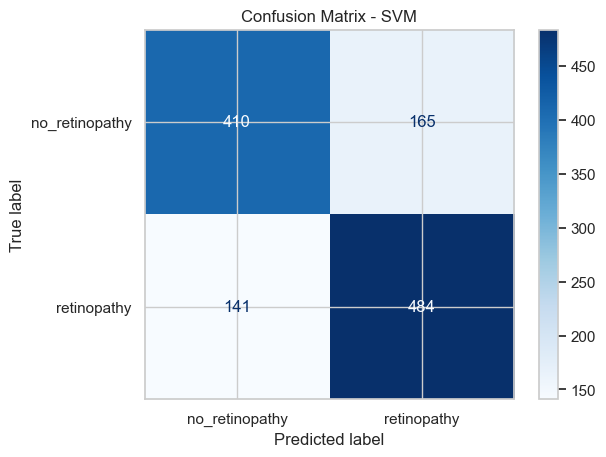

In [54]:
from sklearn.svm import SVC

# ===================== SVM Model =====================
model_svm = SVC(kernel='rbf', probability=True, random_state=42)

# ===================== Train =====================
model_svm.fit(X_train_scaled, y_train)

# ===================== Predict =====================
y_pred = model_svm.predict(X_test_scaled)

# ===================== Evaluate =====================
print("Accuracy and classification report of SVM: ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1) Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2) Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['no_retinopathy', 'retinopathy'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()

# ===================== Create Pipeline for Deployment =====================
prediction_pipeline = Pipeline([
    ('scaler', robust_scaler),   # your fitted RobustScaler
    ('model', model_svm)         # your trained SVM model
])

# ===================== Save the Combined Pipeline =====================
# with open("svm_model.pkl", "wb") as f:
#     dill.dump(prediction_pipeline, f)


# 3. XGBoost Classifier

C:\Users\ramha\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:199: UserWarning: [19:42:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy and classification report of XGBoost: 
Accuracy: 0.745

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       575
           1       0.75      0.76      0.76       625

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200



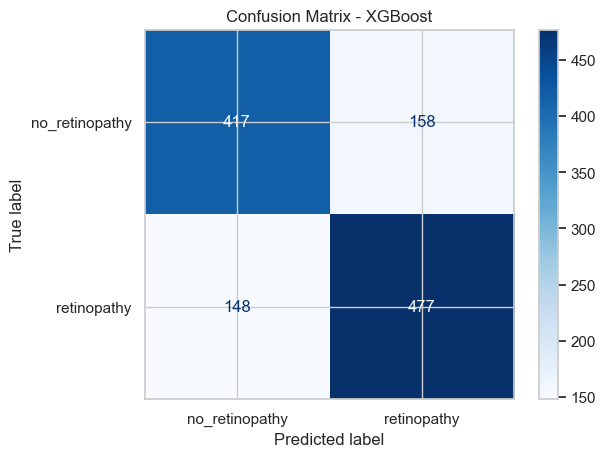

In [55]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import dill

# ===================== XGBoost Model =====================
model_xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# ===================== Train =====================
model_xgb.fit(X_train_scaled, y_train)

# ===================== Predict =====================
y_pred = model_xgb.predict(X_test_scaled)

# ===================== Evaluate =====================
print("Accuracy and classification report of XGBoost: ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1) Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2) Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['no_retinopathy', 'retinopathy'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ===================== Create Pipeline for Deployment =====================
prediction_pipeline = Pipeline([
    ('scaler', robust_scaler),   # your fitted RobustScaler
    ('model', model_xgb)         # your trained XGBoost model
])

# ===================== Save the Combined Pipeline =====================
# with open("xgboost_model.pkl", "wb") as f:
#     dill.dump(prediction_pipeline, f)


# 4. LightGBM Classifier

[LightGBM] [Info] Number of positive: 2462, number of negative: 2338
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1534
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512917 -> initscore=0.051678
[LightGBM] [Info] Start training from score 0.051678
Accuracy and classification report of LightGBM: 
Accuracy: 0.7433333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       575
           1       0.75      0.76      0.76       625

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200



C:\Users\ramha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


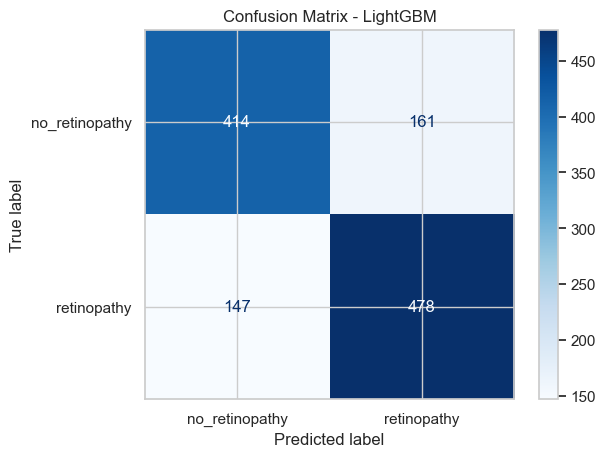

In [56]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import dill

# ===================== LightGBM Model =====================
model_lgb = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# ===================== Train =====================
model_lgb.fit(X_train_scaled, y_train)

# ===================== Predict =====================
y_pred = model_lgb.predict(X_test_scaled)

# ===================== Evaluate =====================
print("Accuracy and classification report of LightGBM: ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1) Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2) Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['no_retinopathy', 'retinopathy'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - LightGBM")
plt.show()

# ===================== Create Pipeline for Deployment =====================
prediction_pipeline = Pipeline([
    ('scaler', robust_scaler),   # your fitted RobustScaler
    ('model', model_lgb)         # your trained LightGBM model
])

# ===================== Save the Combined Pipeline =====================
# with open("lightgbm_model.pkl", "wb") as f:
#     dill.dump(prediction_pipeline, f)


# 5. CatBoost Classifier

Accuracy and classification report of CatBoost: 
Accuracy: 0.7516666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       575
           1       0.76      0.76      0.76       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



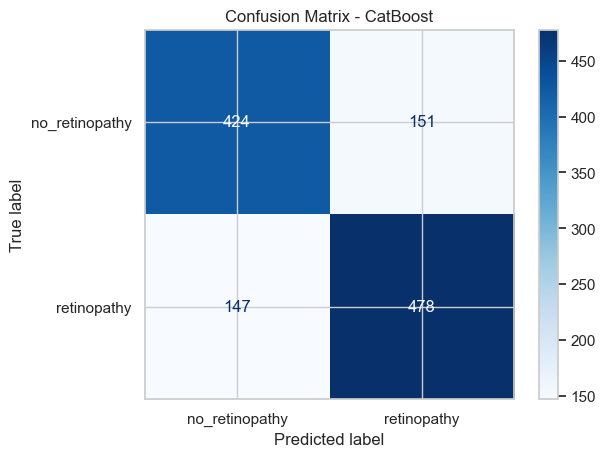

In [57]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import dill

# ===================== CatBoost Model =====================
model_cat = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=0
)

# ===================== Train =====================
model_cat.fit(X_train_scaled, y_train)

# ===================== Predict =====================
y_pred = model_cat.predict(X_test_scaled)

# ===================== Evaluate =====================
print("Accuracy and classification report of CatBoost: ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1) Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2) Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['no_retinopathy', 'retinopathy'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CatBoost")
plt.show()

# ===================== Create Pipeline for Deployment =====================
prediction_pipeline = Pipeline([
    ('scaler', robust_scaler),   # your fitted RobustScaler
    ('model', model_cat)         # your trained CatBoost model
])

# ===================== Save the Combined Pipeline =====================
with open("catboost_model.pkl", "wb") as f:
    dill.dump(prediction_pipeline, f)

In [58]:
import dill
import pandas as pd
import numpy as np

# ===================== Load the saved pipeline =====================
with open("catboost_model.pkl", "rb") as f:
    pipeline = dill.load(f)

# ===================== New raw input data =====================
# Only provide raw columns that exist before feature engineering
new_data = pd.DataFrame([{
    'age': 32,
    'systolic_bp': 100,
    'diastolic_bp': 67,
    'cholesterol': 170
}])

# ===================== Compute Derived Features =====================
# Pulse Pressure (PP): systolic - diastolic
new_data['pulse_pressure'] = new_data['systolic_bp'] - new_data['diastolic_bp']

# BP Ratio: systolic / diastolic
new_data['bp_ratio'] = new_data['systolic_bp'] / new_data['diastolic_bp']

# Age Group (based on bins)
new_data['age_group'] = pd.cut(
    new_data['age'],
    bins=[0, 40, 60, 80, np.inf],
    labels=['young', 'middle_age', 'senior', 'elderly']
)

# Encode age_group into numeric values (same mapping as training)
new_data['age_group_encoded'] = new_data['age_group'].map({
    'young': 0,
    'middle_age': 1,
    'senior': 2,
    'elderly': 3
})

# ===================== Select Final Features (Same as Training) =====================
num_features = [
    'age', 'systolic_bp', 'diastolic_bp', 'cholesterol',
    'pulse_pressure', 'bp_ratio', 'age_group_encoded'
]
new_data_final = new_data[num_features]

# ===================== Make Prediction =====================
prediction = pipeline.predict(new_data_final)
print("Predicted Class:", prediction[0])


Predicted Class: 1
